# #1 Inspect the Dataset

Read the dataset with pandas and show the early of the sample data

In [1]:
import pandas as pd

df = pd.read_csv('data/Advertising.csv')
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


To select the **TV**, drop the other media like the **Radio** and the **Newspaper**

In [2]:
df.drop(columns=['Radio', 'Newspaper'], inplace=True)

In [3]:
df.head()

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,12.0
3,151.5,16.5
4,180.8,17.9


The dimension of the datasets

In [4]:
df.shape

(200, 2)

In [5]:
df.info

<bound method DataFrame.info of         TV  Sales
0    230.1   22.1
1     44.5   10.4
2     17.2   12.0
3    151.5   16.5
4    180.8   17.9
..     ...    ...
195   38.2    7.6
196   94.2   14.0
197  177.0   14.8
198  283.6   25.5
199  232.1   18.4

[200 rows x 2 columns]>

Is there is a null dataset?

In [6]:
df.isnull().sum()

TV       0
Sales    0
dtype: int64

# #2 Dataset understanding using Exploratory Data Analysis (EDA)

EDA techniques can be divided into two types:
+ Numerical techniques
+ Graphical techniques

## Analyze the relationship between the predictor and the target variable

For this, we can use the following techniques:

+ The scatterplot
+ [Pearson correlation coefficient](https://www.wallstreetmojo.com/pearson-correlation-coefficient/)

**The scatterplot** is used to visualize the relationship between the predictor and the target variable. If there is a relationship between the variables, we can look for the following characteristics:

+ **Overall pattern:** This can be a linear pattern, a curvy pattern or an exponential pattern, etc.
+ **Strength:** This refers to how closely the points arrange.
+ **Direction:** This can be either positive or negative. Positive means that when the predictor variable increases, the response variable also increases. Negative means that when the predictor variable increases, the response variable decreases and vice versa.

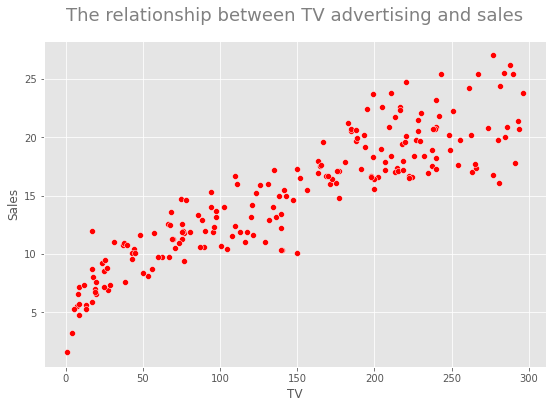

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(9, 6))

sns.scatterplot(x='TV', y = 'Sales', data=df, ax=ax, color='red')

ax.set_title('The relationship between TV advertising and sales', pad=20, size=18, color='gray')

plt.savefig('img_output/tv_scaterplot.png')

**The Pearson correlation** coefficient measures the strength of a linear relationship between two numerical variables. If the relationship is not linear, the correlation coefficient could be misleading.

In [8]:
df.corr(method='pearson')

,TV,Sales
TV,1.000000,0.901208
Sales,0.901208,1.000000


c:\users\rohman\documents\pyenvironment\python-3.7.9-all-packages\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\rohman\documents\pyenvironment\python-3.7.9-all-packages\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


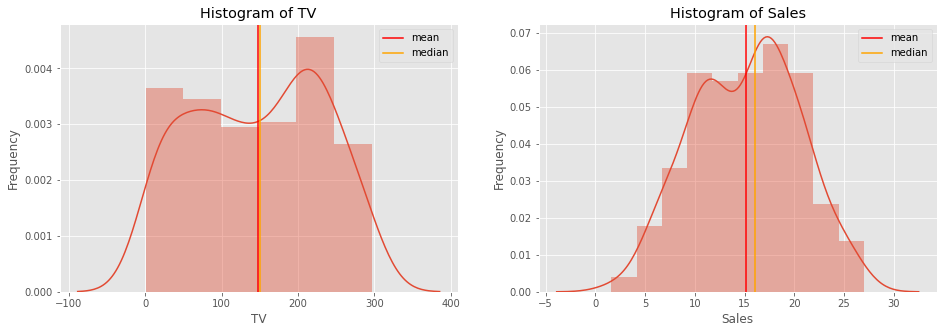

In [9]:
%matplotlib inline

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize=(14, 5.4))
plt.tight_layout(pad=5)

sns.distplot(df['TV'], ax=ax[0])
ax[0].axvline(x=np.mean(df['TV']), color='red', label='mean')
ax[0].axvline(x=np.median(df['TV']), color='orange', label='median')
ax[0].set_ylabel('Frequency')
ax[0].set_title('Histogram of TV')
ax[0].legend(loc='upper right')

sns.distplot(df['Sales'], ax=ax[1])
ax[1].axvline(x=np.mean(df['Sales']), color='red', label='mean')
ax[1].axvline(x=np.median(df['Sales']), color='orange', label='median')
ax[1].set_ylabel('Frequency')
ax[1].set_title('Histogram of Sales')
ax[1].legend(loc='upper right')

plt.savefig('img_output/tv_histogram.png', dpi=100)

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
Sales,200.0,15.1305,5.283892,1.6,11.000,16.00,19.050,27.0


Now, we create boxplots. A boxplot provides a graphical representation of 5-Number Summary — MINIMUM, Q1, Median, Q3 and MAXIMUM.

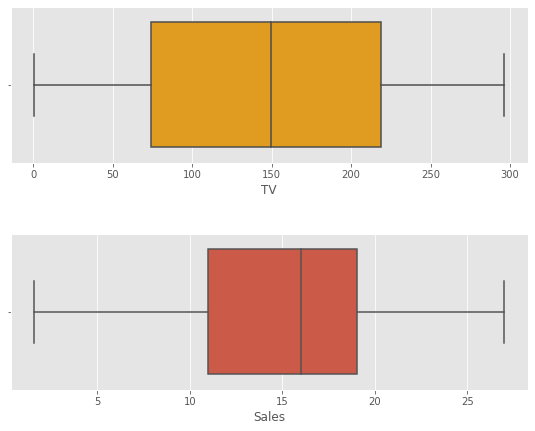

In [11]:
%matplotlib inline

import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(9, 7))
plt.tight_layout(pad=5)

sns.boxplot(x=df['TV'], ax=ax[0], color='orange')
sns.boxplot(x=df['Sales'], ax=ax[1])

plt.savefig('img_output/tv_boxplots.png')